In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
import sys
import os
import pandas as pd
from PIL import Image, ImageEnhance
import random

### Making csv from images

In [ ]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image


In [ ]:
train_path_notumor = "/content/drive/MyDrive/MLProject/Dataset/Training/notumor/"
train_path_glioma = "/content/drive/MyDrive/MLProject/Dataset/Training/glioma/"
train_path_meningioma = "/content/drive/MyDrive/MLProject/Dataset/Training/meningioma/"
train_path_pituitary = "/content/drive/MyDrive/MLProject/Dataset/Training/pituitary/"
train_notumor_imgs = os.listdir(train_path_notumor)
train_glioma_imgs = os.listdir(train_path_glioma)
train_meningioma_imgs = os.listdir(train_path_meningioma)
train_pituitary_imgs = os.listdir(train_path_pituitary)

print(len(train_notumor_imgs))
print(len(train_glioma_imgs))
print(len(train_meningioma_imgs))
print(len(train_pituitary_imgs))

In [ ]:
model = EfficientNetB7(weights='imagenet', include_top=False)
img_base_path = "/content/drive/MyDrive/MLProject/Dataset/Training/"

In [ ]:
# Function to extract features from an image
def imgFeatures (path):
  img = image.load_img(path, target_size=(100, 100))
  img = augment_image(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)
  FlatFeatures = features.ravel()
  return FlatFeatures

In [ ]:
# Extracting features of all images in the class notumor
X = []
i = 0
l = len(train_notumor_imgs)
for name in train_notumor_imgs:
  i+=1
  X.append(imgFeatures(img_base_path+"notumor/"+name))
  print(i,"/",l)
df = pd.DataFrame(X)
df.to_csv("/content/drive/MyDrive/MLProject/Train_notumor_resnet.csv")

In [ ]:
# Extracting features of all images in the class glioma
X1 = []
i = 0
l = len(train_glioma_imgs)
for name in train_glioma_imgs:
  i+=1
  X1.append(imgFeatures(img_base_path+"glioma/"+name))
  print(i,"/",l)

df1 = pd.DataFrame(X1)
df1.to_csv("/content/drive/MyDrive/MLProject/Train_glioma_resnet.csv")

In [ ]:
# Extracting features of all images in the class meningioma
X2 = []
i = 0
l = len(train_meningioma_imgs)
for name in train_meningioma_imgs:
  i+=1
  X2.append(imgFeatures(img_base_path+"meningioma/"+name))
  print(i,"/",l)

df2 = pd.DataFrame(X2)
df2.to_csv("/content/drive/MyDrive/MLProject/Train_meningioma_resnet.csv")

In [ ]:
# Extracting features of all images in the class pituitary
X3 = []
i = 0
l = len(train_pituitary_imgs)
for name in train_pituitary_imgs:
  i+=1
  X3.append(imgFeatures(img_base_path+"pituitary/"+name))
  print(i,"/",l)

df3 = pd.DataFrame(X3)
df3.to_csv("/content/drive/MyDrive/MLProject/Train_pituitary_resnet.csv")

### Reading features from saved csv

In [ ]:
df_notumor = pd.read_csv('/content/drive/MyDrive/MLProject/Train_notumor_EfficientNetB7.csv')


In [ ]:
df_glioma = pd.read_csv('/content/drive/MyDrive/MLProject/Train_glioma_EfficientNetB7.csv')


In [ ]:
df_meningioma = pd.read_csv('/content/drive/MyDrive/MLProject/Train_meningioma_EfficientNetB7.csv')


In [ ]:
df_pituitary = pd.read_csv('/content/drive/MyDrive/MLProject/Train_pituitary_EfficientNetB7.csv')


In [ ]:
print(df_notumor.shape)
print(df_glioma.shape)
print(df_meningioma.shape)
print(df_pituitary.shape)

(1595, 23041)
(1321, 23041)
(1339, 23041)
(1457, 23041)


## Making Dataset

In [ ]:
# Making labels
lst1 = [0 for i in range(1595)]
lst2 = [1 for i in range(1321)]
lst3 = [2 for i in range(1339)]
lst4 = [3 for i in range(1457)]
lst = lst1+lst2+lst3+lst4
df_labels = pd.DataFrame(lst)
df_labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
5707,3
5708,3
5709,3
5710,3


In [ ]:
# Combine test data
df_combined_test = pd.DataFrame()
df_combined_test=df_combined_test.append(df_notumor,ignore_index=True)
df_combined_test=df_combined_test.append(df_glioma,ignore_index=True)
df_combined_test=df_combined_test.append(df_meningioma,ignore_index=True)
df_combined_test=df_combined_test.append(df_pituitary,ignore_index=True)

# Remove "Unnamed" column
df_combined_test = df_combined_test.loc[:, ~df_combined_test.columns.str.contains('^Unnamed')]

#Print
df_combined_test

,0,1,2,3,4,5,6,7,8,9,...,23030,23031,23032,23033,23034,23035,23036,23037,23038,23039
0,-0.037981,-0.009193,0.006350,0.042015,-0.256640,-0.140336,0.050620,-0.278172,0.065613,-0.036060,...,1.192694,1.594335,1.429060,1.253839,2.075806,1.256900,2.621275,0.293566,1.321792,1.966429
1,-0.156214,-0.100083,-0.117130,-0.171436,-0.269392,-0.202008,0.017504,-0.269400,0.013012,-0.126110,...,0.845479,1.261619,1.038556,0.739181,1.495215,0.881335,2.542548,0.207262,0.879085,1.674798
2,-0.059186,0.004956,0.021249,-0.066489,-0.255348,-0.120064,0.095023,-0.278452,0.131978,-0.021111,...,1.230331,1.680729,1.523403,1.263235,2.151452,1.234132,2.836620,0.346943,1.420770,2.180843
3,-0.042368,0.004592,0.044102,-0.005854,-0.251720,-0.114077,0.092662,-0.278284,0.102464,-0.001388,...,1.225276,1.641263,1.476611,1.279240,2.108245,1.269541,2.703057,0.315345,1.357347,2.091348
4,-0.033845,-0.000592,0.018766,0.004275,-0.252046,-0.121730,0.039292,-0.278343,0.071216,-0.053810,...,1.171053,1.496528,1.316984,1.197754,1.986835,1.241727,2.620793,0.265894,1.243399,1.973869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,-0.040628,-0.008374,0.010171,0.029143,-0.256511,-0.139410,0.043919,-0.278273,0.063803,-0.042554,...,1.194067,1.543837,1.392531,1.233759,2.045412,1.245984,2.612178,0.280288,1.293058,1.967363
5708,-0.039094,-0.007928,0.009767,0.035509,-0.256707,-0.139132,0.055618,-0.278136,0.070345,-0.032900,...,1.195974,1.601014,1.438003,1.257084,2.079677,1.253507,2.627423,0.298221,1.325316,1.973920
5709,-0.039229,-0.007444,0.008305,0.038382,-0.256856,-0.141195,0.045106,-0.278215,0.064666,-0.041490,...,1.190904,1.560482,1.401242,1.241612,2.054879,1.250275,2.608226,0.284486,1.299248,1.955282
5710,-0.042699,-0.000385,0.014927,0.003110,-0.256137,-0.129364,0.069013,-0.278116,0.089132,-0.026582,...,1.208209,1.601001,1.446078,1.258860,2.087033,1.249121,2.673733,0.306699,1.333182,2.023403


### PCA

`n_components = 0.9` shape=5712 rows × 5 columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_combined_test = scaler.fit_transform(df_combined_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9)
pca.fit(df_combined_test)
df_combined_testN = pca.transform(df_combined_test)


In [ ]:
df_combined_testN = pd.DataFrame(df_combined_testN)
df_combined_testN

,0,1,2,3,4
0,-6.425547,-0.944465,0.490948,1.143284,-0.446527
1,6.402840,32.295915,-13.280357,8.131193,0.879768
2,9.201238,-0.976003,-1.234442,0.879975,2.572791
3,1.984802,-3.135421,1.072224,-0.450253,-0.037978
4,-1.681741,3.905929,-2.208087,-5.064000,1.803519
...,...,...,...,...,...
5707,-5.204013,0.863314,-0.345562,-1.165671,-0.089290
5708,-5.486648,-1.074118,0.538194,1.125576,-0.597298
5709,-6.212277,0.407924,-0.136595,-0.309947,-0.258400
5710,-0.839870,-0.827042,0.004211,-0.082783,-0.153592


### Read/Write

In [ ]:
# removing zero variance features before writing
sel = VarianceThreshold(threshold=0)
df_combined_testNparray = sel.fit_transform(df_combined_test)
df_combined_test = pd.DataFrame(df_combined_testNparray)
# df_combined_testN,df_labels
df_combined_test.to_csv("/content/drive/MyDrive/MLProject/df_combined_test_EfficientNetB7.csv")
df_labels.to_csv("/content/drive/MyDrive/MLProject/df_labels_EfficientNetB7.csv")

KeyboardInterrupt: ignored

In [ ]:
df_combined_test=pd.read_csv("/content/drive/MyDrive/MLProject/df_combined_test_EfficientNetB7.csv")
df_labels=pd.read_csv("/content/drive/MyDrive/MLProject/df_labels_v.csv")

### Data Pre-processing

In [ ]:
""" Normalise """
scaler = MinMaxScaler()
scaler.fit(df_combined_test)
df_combined_test = pd.DataFrame(scaler.transform(df_combined_test))
df_combined_test


,0,1,2,3,4,5,6,7,8,9,...,23030,23031,23032,23033,23034,23035,23036,23037,23038,23039
0,0.788613,0.746967,0.763457,0.913124,0.497305,0.595551,0.640927,0.001691,0.627178,0.605344,...,0.634140,0.816179,0.660559,0.887360,0.869719,0.429125,0.425113,0.773255,0.711177,0.587618
1,0.287197,0.480639,0.400982,0.200494,0.189532,0.307729,0.576378,0.052362,0.511940,0.305738,...,0.351563,0.611757,0.385585,0.442963,0.590805,0.184591,0.373046,0.637366,0.384109,0.416952
2,0.698687,0.788426,0.807194,0.550870,0.528483,0.690160,0.727477,0.000072,0.772571,0.655079,...,0.664771,0.869260,0.726991,0.895473,0.906059,0.414300,0.567534,0.857300,0.784301,0.713095
3,0.770011,0.787359,0.874281,0.753309,0.616047,0.718104,0.722874,0.001040,0.707912,0.720699,...,0.660657,0.845012,0.694042,0.909294,0.885302,0.437355,0.479201,0.807547,0.737445,0.660722
4,0.806155,0.772169,0.799905,0.787126,0.608180,0.682385,0.618846,0.000700,0.639453,0.546287,...,0.616528,0.756086,0.581641,0.838932,0.826978,0.419245,0.424794,0.729684,0.653261,0.591972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0.777388,0.749364,0.774675,0.870151,0.500414,0.599875,0.627866,0.001105,0.623214,0.583738,...,0.635258,0.785152,0.634838,0.870022,0.855118,0.422017,0.419097,0.752349,0.689949,0.588164
5708,0.783893,0.750671,0.773488,0.891404,0.495685,0.601171,0.650670,0.001897,0.637545,0.615857,...,0.636810,0.820283,0.666857,0.890162,0.871579,0.426915,0.429179,0.780584,0.713781,0.592002
5709,0.783323,0.752089,0.769197,0.900996,0.492103,0.591541,0.630179,0.001440,0.625105,0.587278,...,0.632684,0.795379,0.640971,0.876802,0.859665,0.424811,0.416483,0.758958,0.694522,0.581095
5710,0.768607,0.772775,0.788635,0.783234,0.509434,0.646760,0.676779,0.002011,0.678703,0.636879,...,0.646767,0.820275,0.672543,0.891696,0.875113,0.424060,0.459807,0.793933,0.719592,0.620960


In [ ]:
## Reducing the features using variance threshold
sel = VarianceThreshold(threshold=0)
df_combined_testNparray = sel.fit_transform(df_combined_test)
print(df_combined_testNparray)
df_combined_testN = pd.DataFrame(df_combined_testNparray)
df_combined_testN

[[-3.7981240e-02 -9.1925350e-03  6.3496814e-03 ...  2.9356610e-01
   1.3217915e+00  1.9664288e+00]
 [-1.5621415e-01 -1.0008321e-01 -1.1712955e-01 ...  2.0726232e-01
   8.7908494e-01  1.6747984e+00]
 [-5.9185646e-02  4.9564308e-03  2.1248775e-02 ...  3.4694308e-01
   1.4207696e+00  2.1808429e+00]
 ...
 [-3.9228715e-02 -7.4443310e-03  8.3047300e-03 ...  2.8448567e-01
   1.2992475e+00  1.9552822e+00]
 [-4.2698734e-02 -3.8474886e-04  1.4926684e-02 ...  3.0669880e-01
   1.3331817e+00  2.0234032e+00]
 [-3.7593115e-02  5.0353496e-03  3.0986074e-02 ...  3.3722590e-01
   1.4015841e+00  2.0905876e+00]]


,0,1,2,3,4,5,6,7,8,9,...,23030,23031,23032,23033,23034,23035,23036,23037,23038,23039
0,-0.037981,-0.009193,0.006350,0.042015,-0.256640,-0.140336,0.050620,-0.278172,0.065613,-0.036060,...,1.192694,1.594335,1.429060,1.253839,2.075806,1.256900,2.621275,0.293566,1.321792,1.966429
1,-0.156214,-0.100083,-0.117130,-0.171436,-0.269392,-0.202008,0.017504,-0.269400,0.013012,-0.126110,...,0.845479,1.261619,1.038556,0.739181,1.495215,0.881335,2.542548,0.207262,0.879085,1.674798
2,-0.059186,0.004956,0.021249,-0.066489,-0.255348,-0.120064,0.095023,-0.278452,0.131978,-0.021111,...,1.230331,1.680729,1.523403,1.263235,2.151452,1.234132,2.836620,0.346943,1.420770,2.180843
3,-0.042368,0.004592,0.044102,-0.005854,-0.251720,-0.114077,0.092662,-0.278284,0.102464,-0.001388,...,1.225276,1.641263,1.476611,1.279240,2.108245,1.269541,2.703057,0.315345,1.357347,2.091348
4,-0.033845,-0.000592,0.018766,0.004275,-0.252046,-0.121730,0.039292,-0.278343,0.071216,-0.053810,...,1.171053,1.496528,1.316984,1.197754,1.986835,1.241727,2.620793,0.265894,1.243399,1.973869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,-0.040628,-0.008374,0.010171,0.029143,-0.256511,-0.139410,0.043919,-0.278273,0.063803,-0.042554,...,1.194067,1.543837,1.392531,1.233759,2.045412,1.245984,2.612178,0.280288,1.293058,1.967363
5708,-0.039094,-0.007928,0.009767,0.035509,-0.256707,-0.139132,0.055618,-0.278136,0.070345,-0.032900,...,1.195974,1.601014,1.438003,1.257084,2.079677,1.253507,2.627423,0.298221,1.325316,1.973920
5709,-0.039229,-0.007444,0.008305,0.038382,-0.256856,-0.141195,0.045106,-0.278215,0.064666,-0.041490,...,1.190904,1.560482,1.401242,1.241612,2.054879,1.250275,2.608226,0.284486,1.299248,1.955282
5710,-0.042699,-0.000385,0.014927,0.003110,-0.256137,-0.129364,0.069013,-0.278116,0.089132,-0.026582,...,1.208209,1.601001,1.446078,1.258860,2.087033,1.249121,2.673733,0.306699,1.333182,2.023403


### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_combined_testN,df_labels,test_size=0.25,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4284, 23040)
(4284, 1)
(1428, 23040)
(1428, 1)


In [ ]:
#For printing reports for the model
def print_reports(model):
  predictedy_test=model.predict(X_test)
  conf_mat = confusion_matrix(y_test, predictedy_test)
  acc_scr = accuracy_score(y_test, predictedy_test)
  print("Accuracy Score = ",acc_scr)
  print("clf rprt =\n",classification_report(y_test,predictedy_test))
  print("\nConfusion Matrix")
  disp=ConfusionMatrixDisplay(conf_mat)
  disp.plot()

### Decision tree clf

|params|accuracy|
|--|--|
|Normalized, var thresh = 0.01|0.6274509803921569|
|var thresh = 0|0.6841736694677871|
|PCA 0.9|0.47829131652661067|


Accuracy Score =  0.6841736694677871
clf rprt =
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       408
           1       0.61      0.56      0.58       332
           2       0.52      0.57      0.54       328
           3       0.71      0.75      0.73       360

    accuracy                           0.68      1428
   macro avg       0.68      0.67      0.68      1428
weighted avg       0.69      0.68      0.69      1428


Confusion Matrix


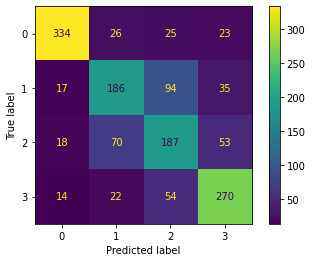

In [ ]:
#Create an instance of decision tree classifier
clf_dt = DecisionTreeClassifier(random_state=0)

#fit the model
clf_dt.fit(X_train,y_train.values.ravel())

#print report
print_reports(clf_dt)

### Random Forest

|params|accuracy|
|--|--|
|Normalized, var thresh = 0.01|0.8235294117647058|>
|var thresh = 0|0.7934173669467787|
|PCA 0.9|0.5560224089635855|

Accuracy Score =  0.7934173669467787
clf rprt =
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       408
           1       0.76      0.67      0.71       332
           2       0.66      0.62      0.64       328
           3       0.80      0.90      0.85       360

    accuracy                           0.79      1428
   macro avg       0.78      0.78      0.78      1428
weighted avg       0.79      0.79      0.79      1428


Confusion Matrix


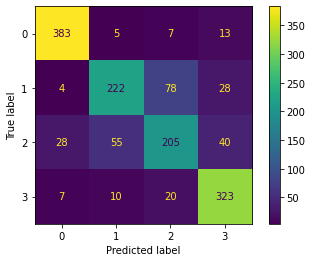

In [ ]:
#Create an instance of random forest classifier
clf_rf = RandomForestClassifier(random_state=0)

#fit the model
clf_rf.fit(X_train,y_train.values.ravel())

#Print report
print_reports(clf_rf)

|params|accuracy|
|--|--|
|Normalized, var thresh = 0.01|0.7338935574229691|
|var thresh = 0|0.7836134453781513|
|PCA 0.9|0.5483193277310925|

Accuracy Score =  0.7836134453781513
clf rprt =
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       408
           1       0.76      0.65      0.70       332
           2       0.65      0.60      0.62       328
           3       0.78      0.90      0.84       360

    accuracy                           0.78      1428
   macro avg       0.77      0.77      0.77      1428
weighted avg       0.78      0.78      0.78      1428


Confusion Matrix


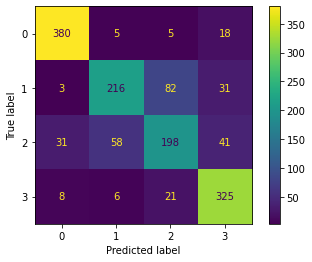

In [ ]:
#Create an instance of random forest classifier
clf_rf1 = RandomForestClassifier(random_state=0,criterion='entropy',n_estimators=220)

#fit the model
clf_rf1.fit(X_train,y_train.values.ravel())

#Print report
print_reports(clf_rf1)

### SVM

|params|accuracy|
|---|---|
|Normalized, var thresh = 0.01|0.7675070028011205|
|var thresh = 0|0.8186274509803921|
|PCA 0.9|0.46638655462184875|


Accuracy Score =  0.8186274509803921
clf rprt =
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       408
           1       0.75      0.79      0.77       332
           2       0.69      0.59      0.63       328
           3       0.86      0.91      0.89       360

    accuracy                           0.82      1428
   macro avg       0.81      0.81      0.81      1428
weighted avg       0.81      0.82      0.81      1428


Confusion Matrix


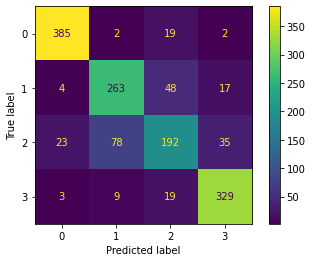

In [ ]:
#Create an instance of svm
svm_model1 = SVC(kernel = "linear", C=110)

#fit the model
svm_model1.fit(X_train,y_train.values.ravel())

#Print report
print_reports(svm_model1)

### ExtraTreesClassifier

|params|accuracy|
|---|---|
|Normalized, var thresh = 0.01|0.7443977591036415|
|var thresh = 0|0.7864145658263305|
|PCA 0.9|0.5497198879551821|

Accuracy Score =  0.7864145658263305
clf rprt =
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       408
           1       0.75      0.66      0.70       332
           2       0.64      0.65      0.65       328
           3       0.80      0.88      0.84       360

    accuracy                           0.79      1428
   macro avg       0.78      0.78      0.78      1428
weighted avg       0.79      0.79      0.78      1428


Confusion Matrix


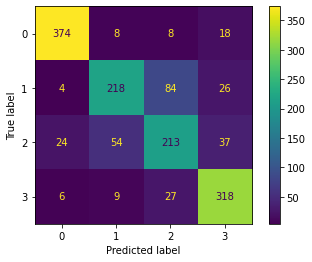

In [ ]:
#Create an instance of Extra Trees Classifier
ExtraTreesClassifier_m = ExtraTreesClassifier()

#fit the model
ExtraTreesClassifier_m.fit(X_train,y_train.values.ravel())

#Print Report
print_reports(ExtraTreesClassifier_m)

### AdaBoostClassifier

|params|accuracy|
|---|---|
|Normalized, var thresh = 0.01|0.6288515406162465|
|var thresh = 0|0.680672268907563|
|PCA 0.9|0.45448179271708683|

Accuracy Score =  0.680672268907563
clf rprt =
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       408
           1       0.56      0.74      0.64       332
           2       0.49      0.29      0.37       328
           3       0.74      0.78      0.76       360

    accuracy                           0.68      1428
   macro avg       0.66      0.67      0.65      1428
weighted avg       0.67      0.68      0.67      1428


Confusion Matrix


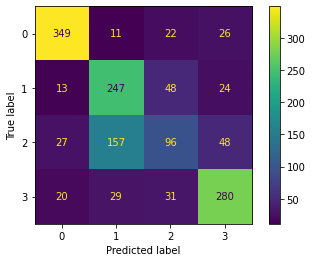

In [ ]:
#Create an instance of AdaBoost
AdaBoostClassifier_model = AdaBoostClassifier()

#fit the model
AdaBoostClassifier_model.fit(X_train,y_train.values.ravel())

#Print report
print_reports(AdaBoostClassifier_model)

### Naïve Bayes

|params|accuracy|
|---|---|
|Normalized, var thresh = 0.01|0.37745098039215685|
|var thresh = 0|0.38445378151260506|
|PCA 0.9|0.3788515406162465|

Accuracy Score =  0.38445378151260506
clf rprt =
               precision    recall  f1-score   support

           0       0.71      0.30      0.42       408
           1       0.34      0.76      0.47       332
           2       0.32      0.23      0.27       328
           3       0.35      0.28      0.31       360

    accuracy                           0.38      1428
   macro avg       0.43      0.39      0.37      1428
weighted avg       0.44      0.38      0.37      1428


Confusion Matrix


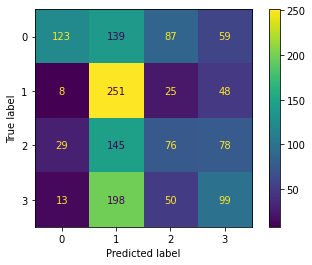

In [ ]:
#Create an instance of Gaussian Naive Bayes
GaussianNB_model = GaussianNB()

#fit the model
GaussianNB_model.fit(X_train,y_train.values.ravel())

#Print report
print_reports(GaussianNB_model)

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
svm_model1 = SVC(kernel = "linear", C=2.2)
clf_rf1 = RandomForestClassifier(random_state=0,criterion='entropy',n_estimators=220)
GaussianNB_model = GaussianNB()
AdaBoostClassifier_model = AdaBoostClassifier()


In [ ]:
print("SVM vs AdaBoost")
t, p = paired_ttest_5x2cv(estimator1=AdaBoostClassifier_model, estimator2=svm_model1, X=df_combined_testN, y=df_labels.to_numpy().ravel(),scoring = "accuracy", random_seed=42)
print(f"t statistic: {t}, p-value: {p}\n")

if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')
 
print("SVM vs Random Forest")
t, p = paired_ttest_5x2cv(estimator1=clf_rf1, estimator2=svm_model1, X=df_combined_testN, y=df_labels.to_numpy().ravel(),scoring = "accuracy", random_seed=42)
print(f"t statistic: {t}, p-value: {p}\n")

if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

SVM vs AdaBoost
